In [25]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Define base directory
base_dir = Path('/Users/tabassum221b/Downloads/NetflixProject').resolve()

# Define specific folders
data_dir = base_dir / 'netflix-report'
notebook_dir = base_dir / 'notebook'

# Read data
viewing_activity = pd.read_csv(data_dir/'CONTENT_INTERACTION'/'ViewingActivity_Updated.csv')
messages = pd.read_csv(data_dir/'MESSAGES'/'MessagesSentByNetflix.csv')

In [27]:
viewing_activity.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Title', 'Device Type',
       'Country', 'User', 'Duration (min)', 'Duration (hr)', 'Start Time UTC',
       'Year', 'Month', 'Date_of_month', 'day_of_week', 'day_name', 'TV Show',
       'Season', 'Episode', 'Content Type', 'Date'],
      dtype='object')

### Are all profiles being used equally ?

Note : Profile Oishi is shared by 2 users

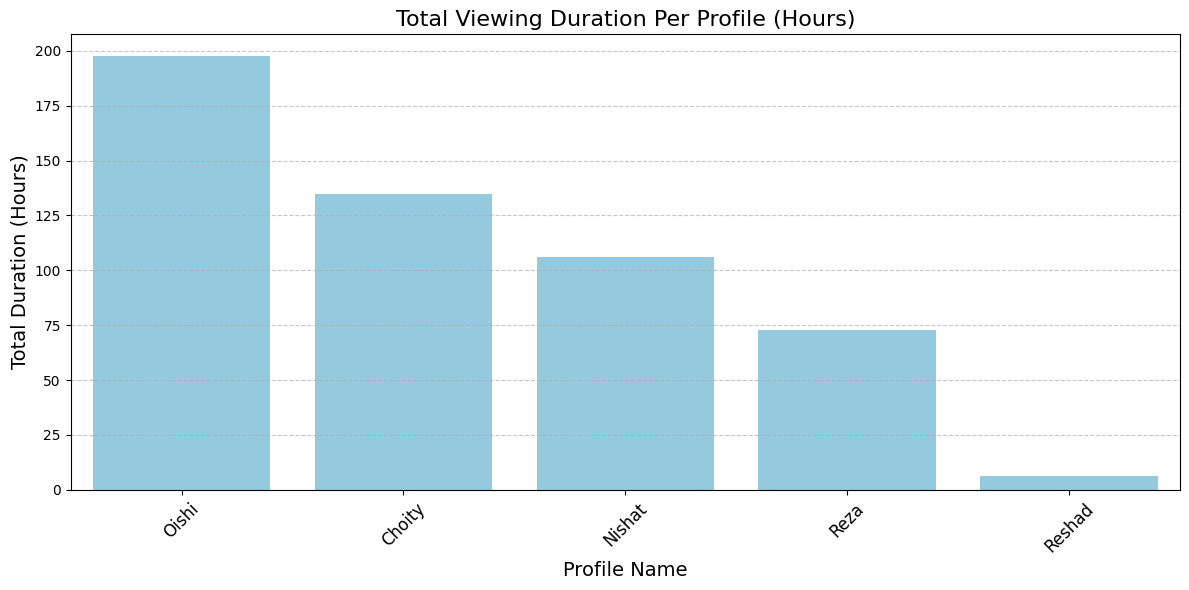

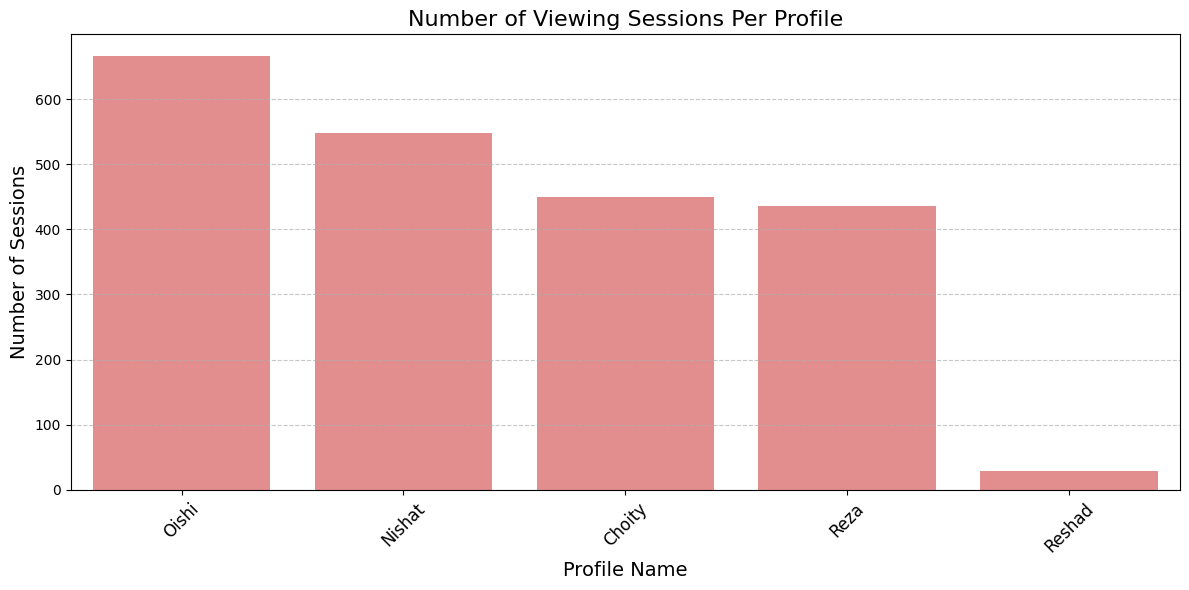

  Profile Name  Total_Duration_hr  Number_of_Sessions
0       Choity             134.66                 449
1       Nishat             106.05                 548
2        Oishi             197.60                 666
3       Reshad               6.12                  29
4         Reza              73.03                 435


In [28]:
# Group by Profile and calculate total usage metrics
profile_usage_summary = viewing_activity.groupby('Profile Name').agg(
    Total_Duration_hr=('Duration (hr)', 'sum'),
    Number_of_Sessions=('Start Time', 'count')
).reset_index()

# Sort the data by Total Duration
profile_usage_sorted = profile_usage_summary.sort_values(by='Total_Duration_hr', ascending=False)

# Plot Total Duration (in hours)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=profile_usage_sorted,
    x='Profile Name',
    y='Total_Duration_hr',
    color='skyblue'
)
plt.title('Total Viewing Duration Per Profile (Hours)', fontsize=16)
plt.ylabel('Total Duration (Hours)', fontsize=14)
plt.xlabel('Profile Name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Sort the data by Number of Sessions
profile_sessions_sorted = profile_usage_summary.sort_values(by='Number_of_Sessions', ascending=False)

# Plot Number of Sessions
plt.figure(figsize=(12, 6))
sns.barplot(
    data=profile_sessions_sorted,
    x='Profile Name',
    y='Number_of_Sessions',
    color='lightcoral'
)
plt.title('Number of Viewing Sessions Per Profile', fontsize=16)
plt.ylabel('Number of Sessions', fontsize=14)
plt.xlabel('Profile Name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the sorted summary for reference
print(profile_usage_summary)


### Analyse viewing activity per User

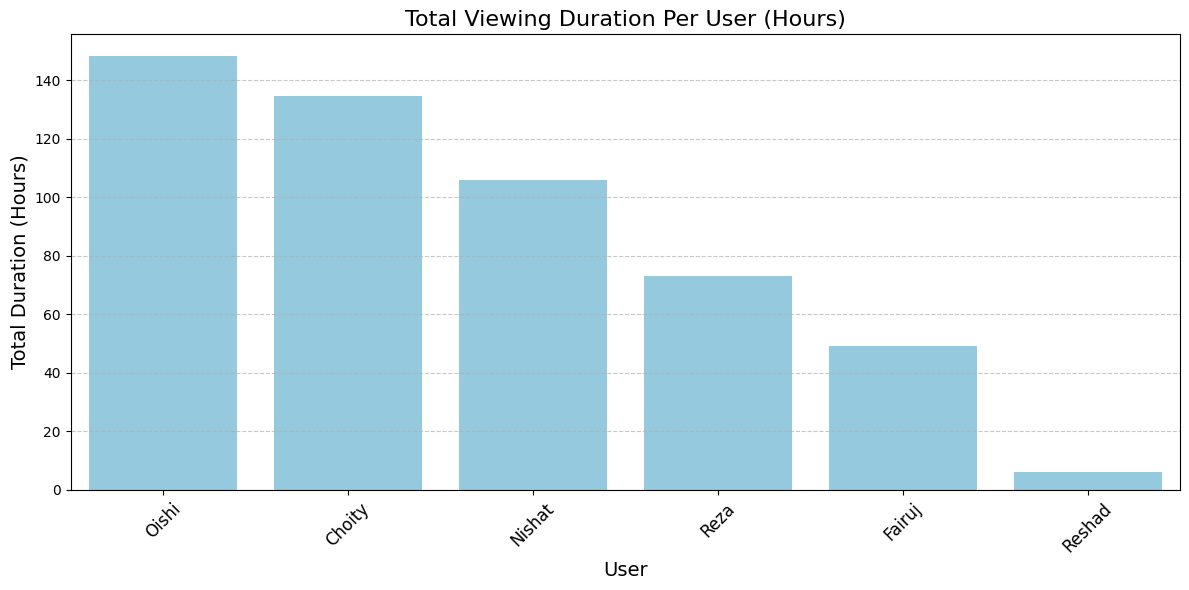

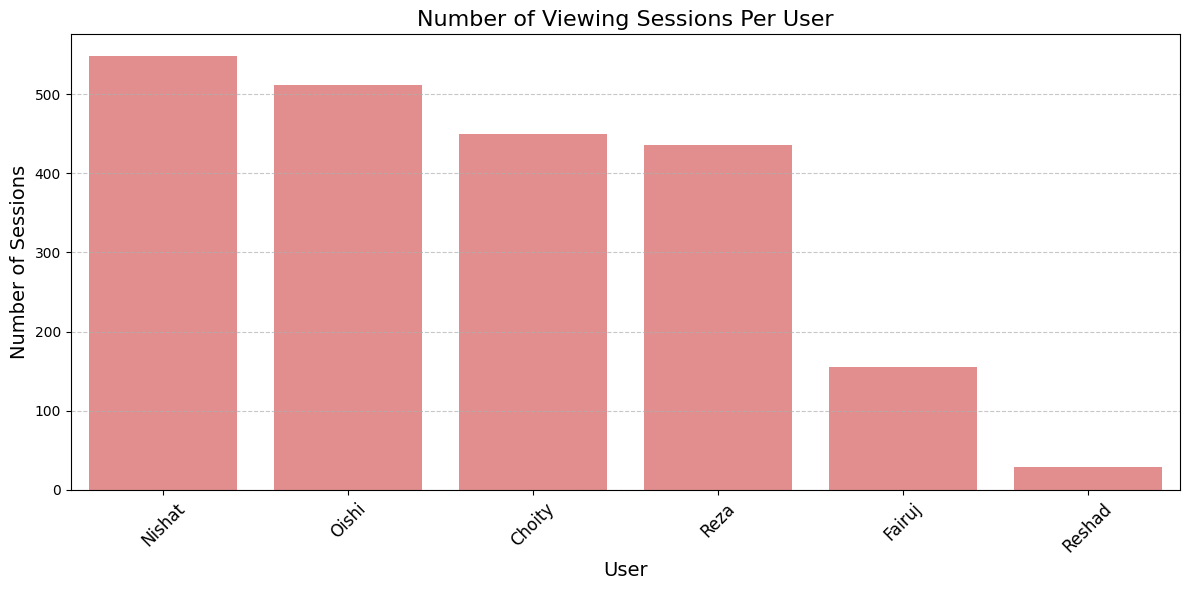

     User  Total_Duration_hr  Number_of_Sessions
0  Choity             134.66                 449
1  Fairuj              49.27                 155
2  Nishat             106.05                 548
3   Oishi             148.33                 511
4  Reshad               6.12                  29
5    Reza              73.03                 435


In [29]:
# Group by User and calculate total usage metrics
user_usage_summary = viewing_activity.groupby('User').agg(
    Total_Duration_hr=('Duration (hr)', 'sum'),
    Number_of_Sessions=('Start Time', 'count')
).reset_index()

# Sort the data by Total Duration
user_usage_sorted = user_usage_summary.sort_values(by='Total_Duration_hr', ascending=False)

# Plot Total Duration (in hours)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=user_usage_sorted,
    x='User',
    y='Total_Duration_hr',
    color='skyblue'
)
plt.title('Total Viewing Duration Per User (Hours)', fontsize=16)
plt.ylabel('Total Duration (Hours)', fontsize=14)
plt.xlabel('User', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Sort the data by Number of Sessions
user_sessions_sorted = user_usage_summary.sort_values(by='Number_of_Sessions', ascending=False)

# Plot Number of Sessions
plt.figure(figsize=(12, 6))
sns.barplot(
    data=user_sessions_sorted,
    x='User',
    y='Number_of_Sessions',
    color='lightcoral'
)
plt.title('Number of Viewing Sessions Per User', fontsize=16)
plt.ylabel('Number of Sessions', fontsize=14)
plt.xlabel('User', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the sorted summary for reference
print(user_usage_summary)


### Viewing patters

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/2396042972.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


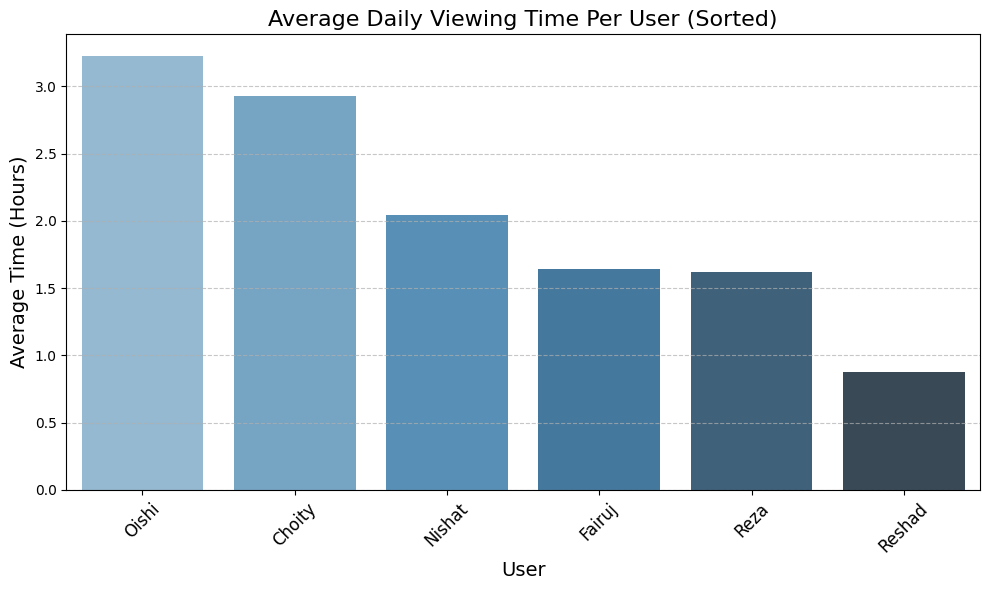

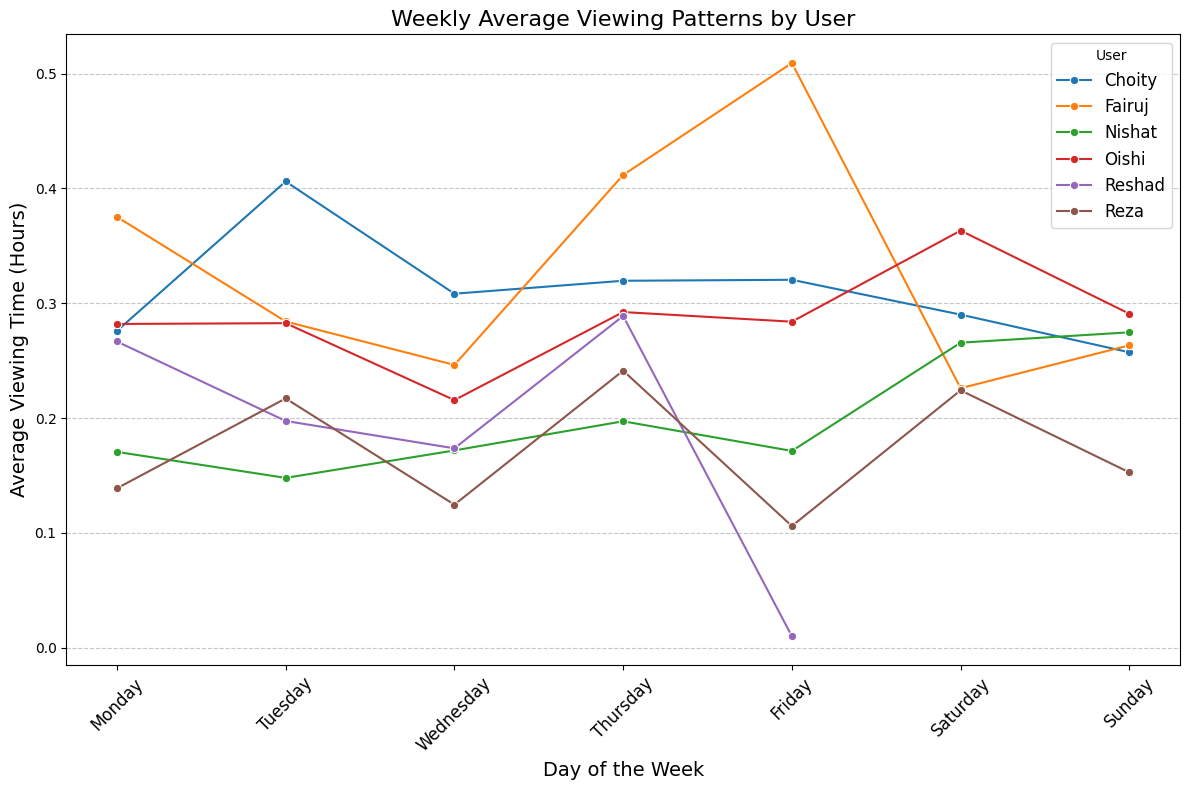

In [30]:
# Group data by User and Date to calculate daily viewing patterns
daily_patterns = (
    viewing_activity.groupby(['User', 'Date'])['Duration (hr)']
    .sum()
    .reset_index()
)

# Calculate the average daily viewing time for each user
daily_avg = (
    daily_patterns.groupby('User')['Duration (hr)']
    .mean()
    .reset_index()
    .rename(columns={'Duration (hr)': 'Avg Daily Viewing Time (hr)'})
)

# Group data by User and day of the week for weekly patterns
average_weekly_patterns = (
    viewing_activity.groupby(['User', 'day_name'])['Duration (hr)']
    .mean()
    .reset_index()
)

# Ensure days are in order for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_weekly_patterns['day_name'] = pd.Categorical(
    average_weekly_patterns['day_name'], categories=days_order, ordered=True
)

# Sort for consistent plotting
average_weekly_patterns = average_weekly_patterns.sort_values(by=['User', 'day_name'])

# --- Visualizations ---

# Sort daily average viewing time in descending order
daily_avg_sorted = daily_avg.sort_values(by='Avg Daily Viewing Time (hr)', ascending=False)

# Bar plot: Average daily viewing time per user (sorted)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=daily_avg_sorted,
    x='User',
    y='Avg Daily Viewing Time (hr)',
    palette='Blues_d'
)
plt.title('Average Daily Viewing Time Per User (Sorted)', fontsize=16)
plt.ylabel('Average Time (Hours)', fontsize=14)
plt.xlabel('User', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Line plot: Weekly average viewing patterns for each user (Monday to Sunday)
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=average_weekly_patterns,
    x='day_name',
    y='Duration (hr)',
    hue='User',
    marker='o'
)
plt.title('Weekly Average Viewing Patterns by User', fontsize=16)
plt.ylabel('Average Viewing Time (Hours)', fontsize=14)
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='User', fontsize=12)
plt.tight_layout()
plt.show()


### Separate analysis for each User

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3972980201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


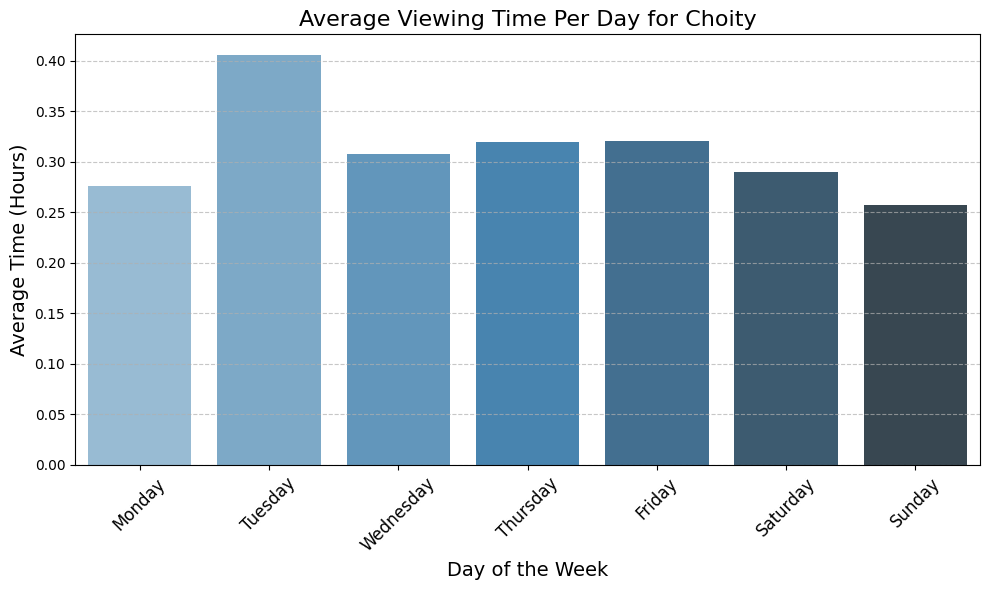

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3972980201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


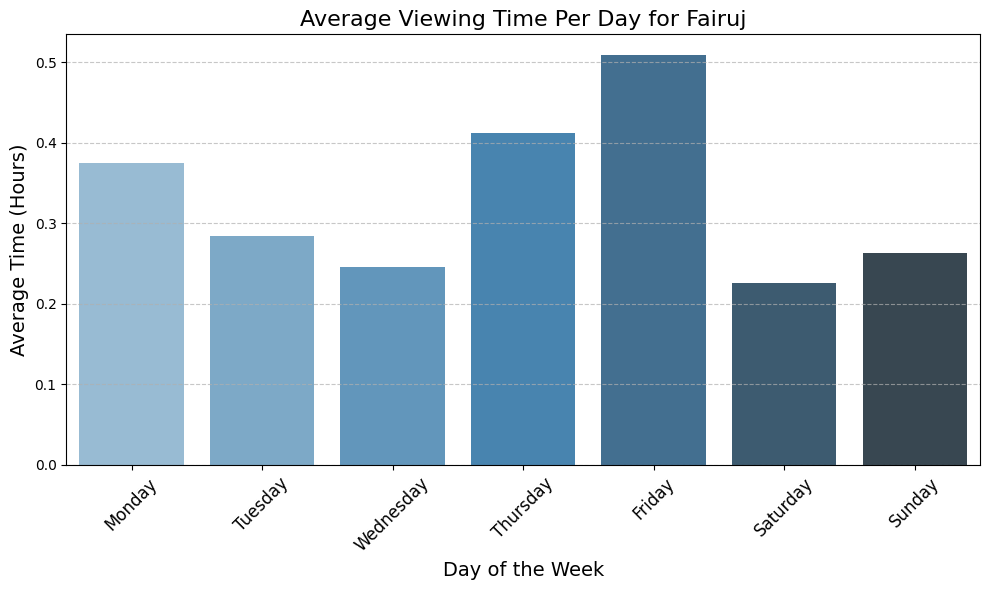

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3972980201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


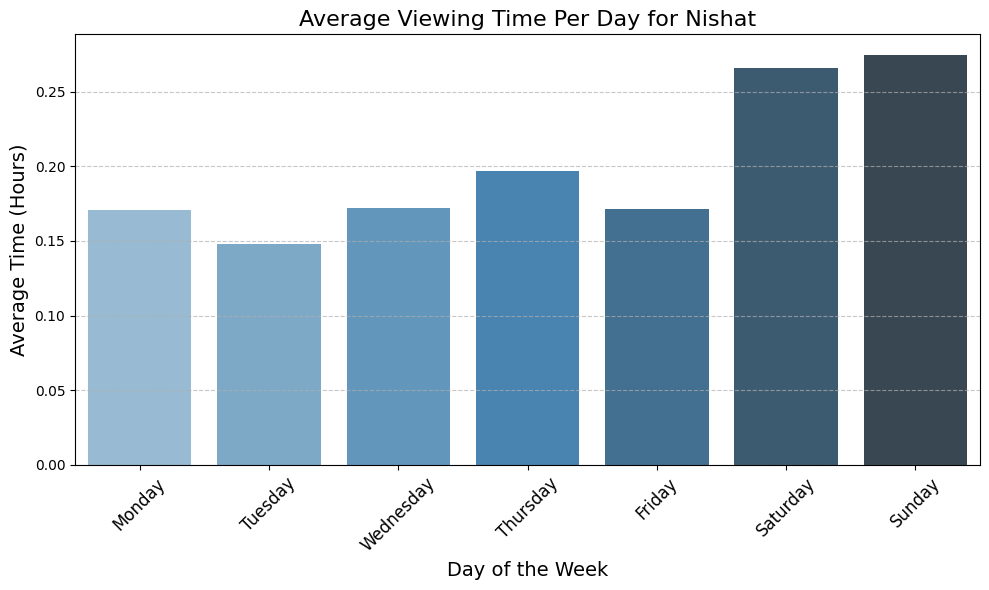

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3972980201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


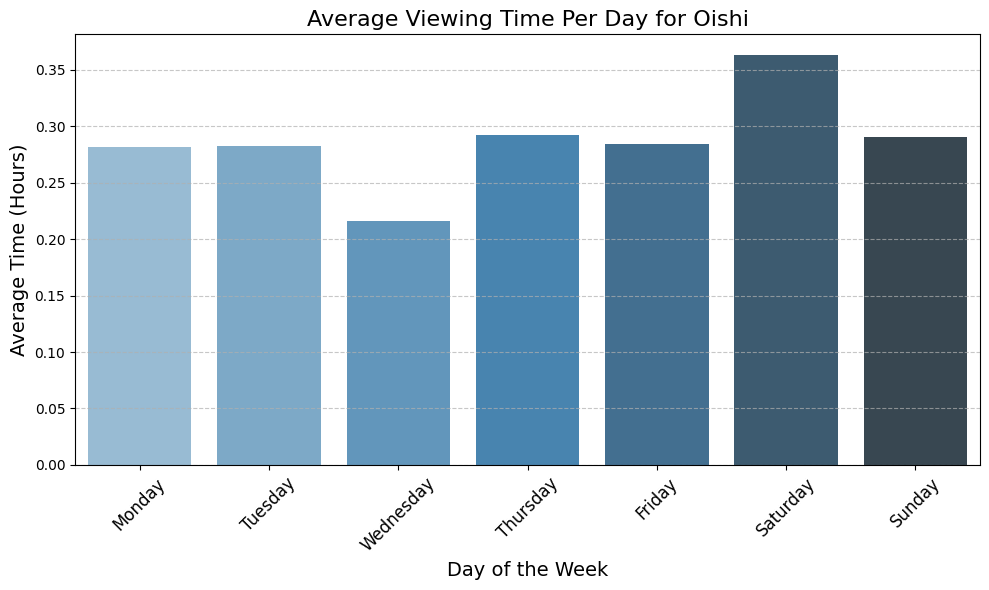

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3972980201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


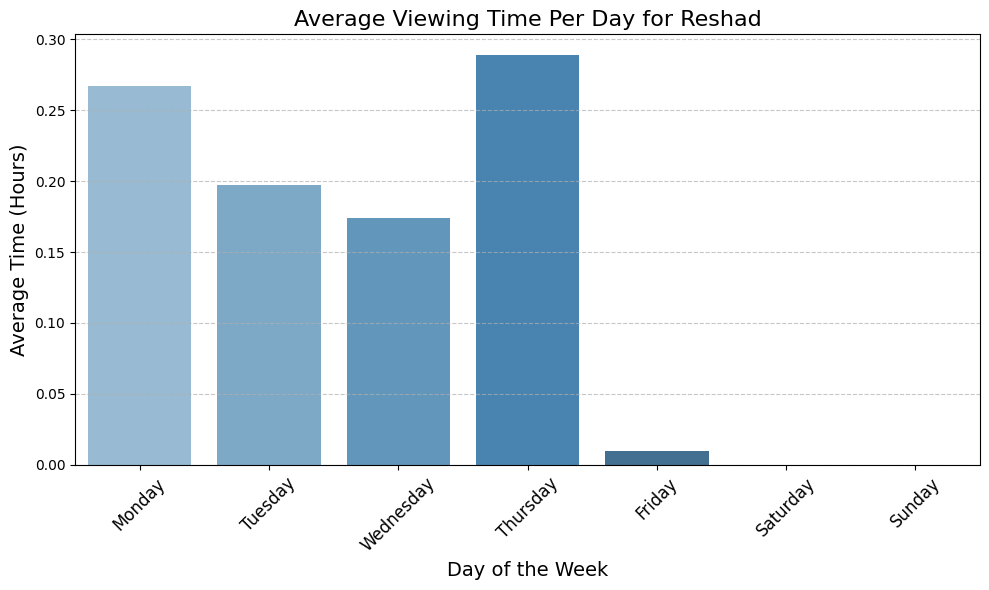

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3972980201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


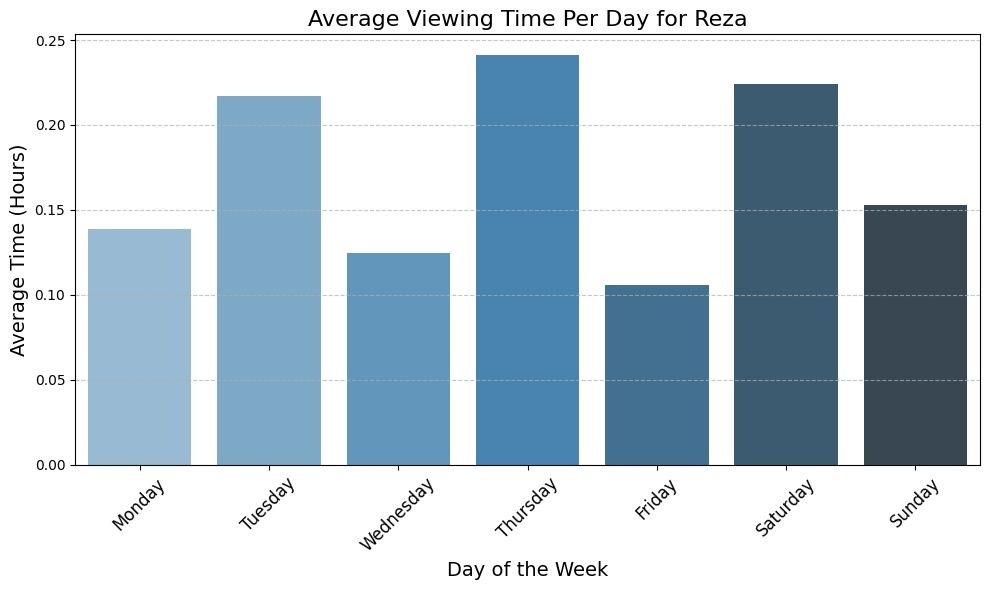

In [31]:
# Ensure 'day_name' is ordered Monday to Sunday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_weekly_patterns['day_name'] = pd.Categorical(
    average_weekly_patterns['day_name'], categories=days_order, ordered=True
)

# Sort the data for consistent plotting
average_weekly_patterns = average_weekly_patterns.sort_values(by=['User', 'day_name'])

# Loop through each user and plot their weekly average viewing pattern
users = average_weekly_patterns['User'].unique()

for user in users:
    # Filter data for the current user
    user_data = average_weekly_patterns[average_weekly_patterns['User'] == user]
    
    # Plot a bar chart for the user's weekly average viewing pattern
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=user_data,
        x='day_name',
        y='Duration (hr)',
        palette='Blues_d'
    )
    plt.title(f'Average Viewing Time Per Day for {user}', fontsize=16)
    plt.ylabel('Average Time (Hours)', fontsize=14)
    plt.xlabel('Day of the Week', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Binge Watching

In [32]:
# Step 1: Filter for TV Shows
tv_shows = viewing_activity[viewing_activity['Content Type'] == 'TV Show']

# Step 2: Handle Missing Episodes
tv_shows['Episode'] = tv_shows['Episode'].fillna(tv_shows['Season'])

# Step 3: Group by User, TV Show, and Date to Count Episodes Watched Per Day
binge_watch_data = (
    tv_shows.groupby(['User', 'TV Show', 'Date'])['Episode']
    .count()
    .reset_index()
    .rename(columns={'Episode': 'Episode_Count'})
)

# Step 4: Define Binge-Watching (4 or more episodes in one day)
binge_watch_data = binge_watch_data[binge_watch_data['Episode_Count'] >= 4]

# Step 5: Count Unique Binge-Watch Days for Each TV Show Per User
unique_binge_per_user = (
    binge_watch_data.groupby(['User', 'TV Show'])['Date']
    .count()  # Count the number of unique binge-watching days per show
    .reset_index()
    .rename(columns={'Date': 'Unique_Binge_Days'})
)

# Step 6: Identify Top 5 Binge-Watched Programs Per User
top_5_binge_per_user = (
    unique_binge_per_user.groupby('User')
    .apply(lambda x: x.nlargest(5, 'Unique_Binge_Days'))
    .reset_index(drop=True)
)

# Step 7: Identify Overall Top Binge-Watched Programs
top_binge_overall = (
    unique_binge_per_user.groupby('TV Show')['Unique_Binge_Days']
    .sum()
    .reset_index()
    .sort_values(by='Unique_Binge_Days', ascending=False)
    .head(10)
)


/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/2728533040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['Episode'] = tv_shows['Episode'].fillna(tv_shows['Season'])
/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/2728533040.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_binge_per_user.groupby('User')


/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3239987931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


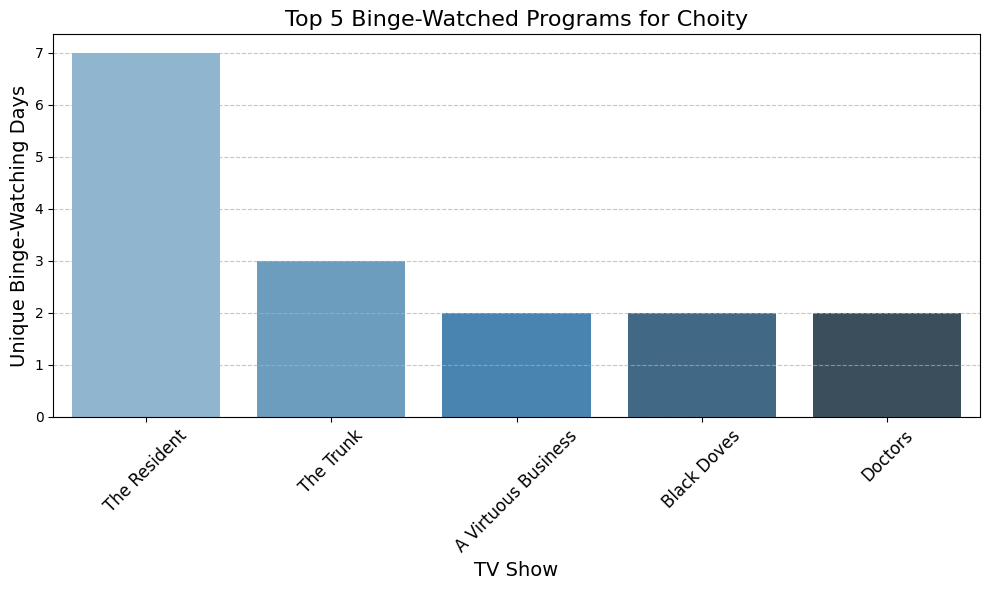

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3239987931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


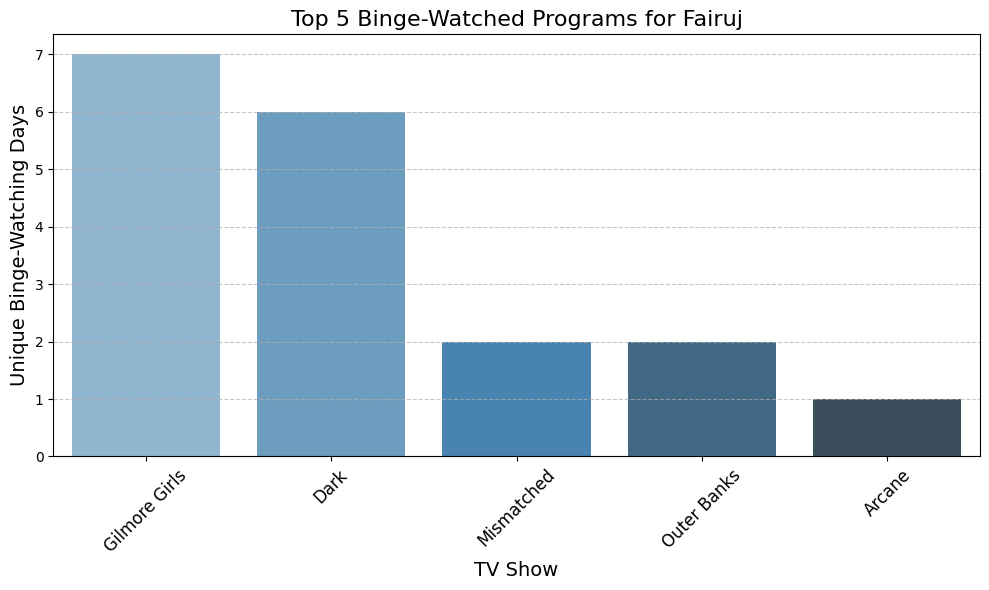

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3239987931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


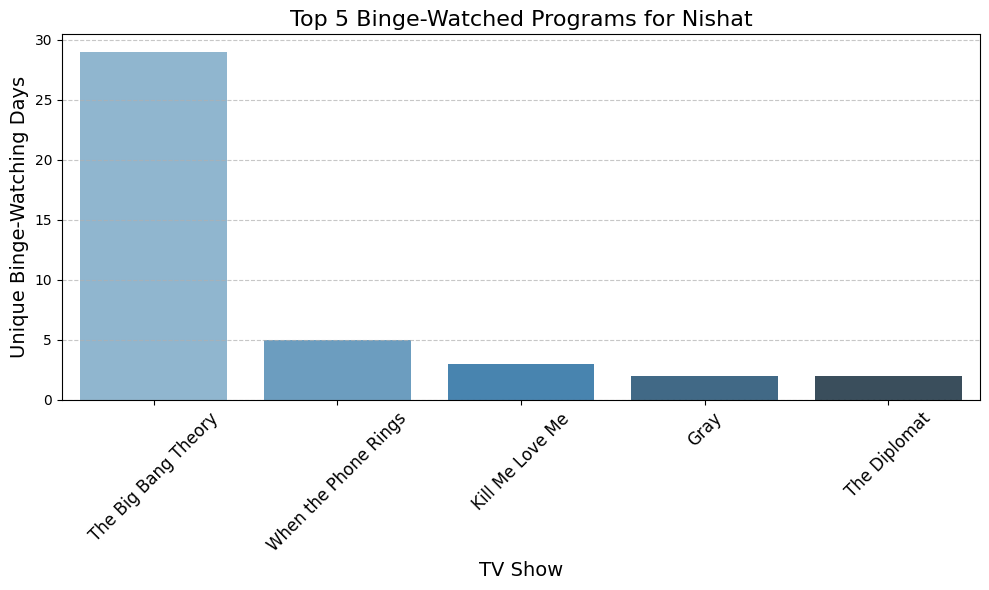

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3239987931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


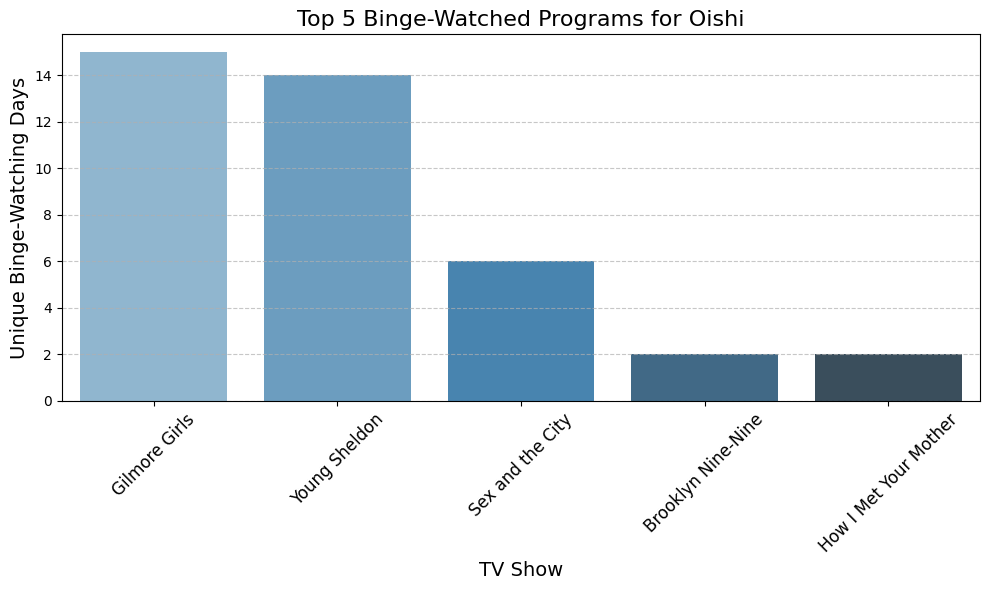

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3239987931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


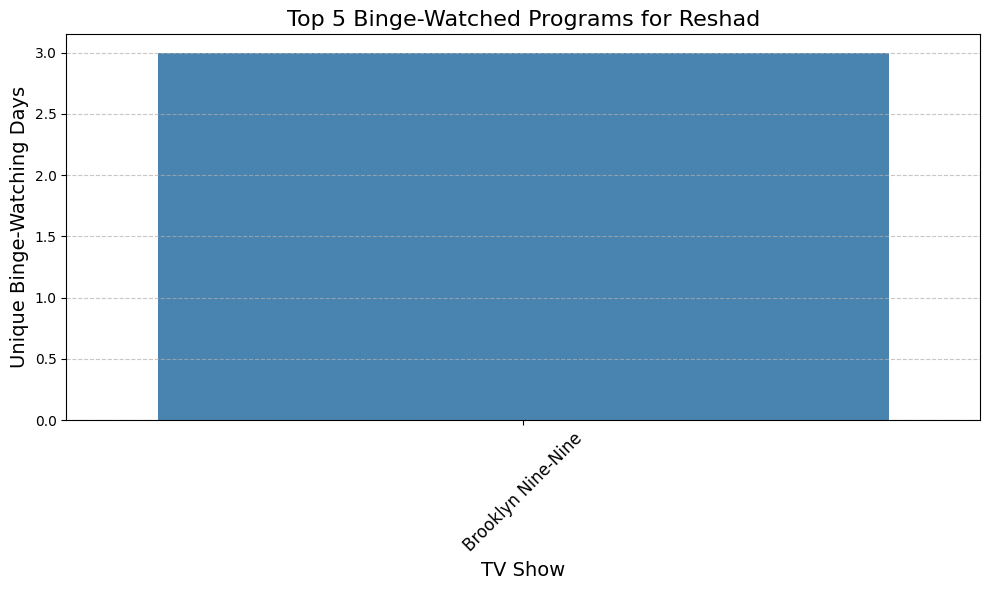

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3239987931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


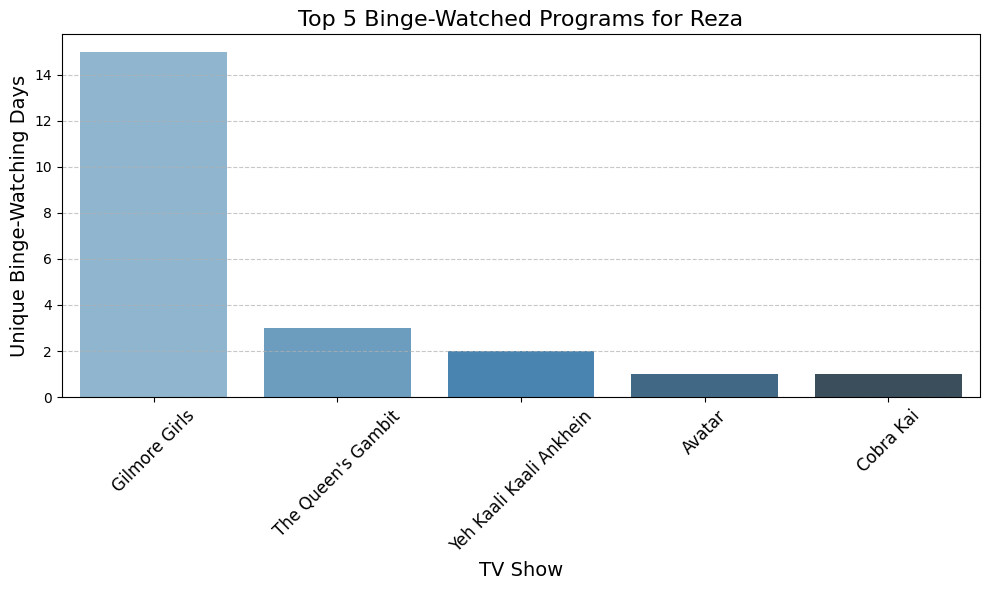

In [33]:
# Loop through each user and plot their top 5 binge-watched programs
users = top_5_binge_per_user['User'].unique()

for user in users:
    # Filter data for the current user
    user_data = top_5_binge_per_user[top_5_binge_per_user['User'] == user]
    
    # Plot the top 5 binge-watched programs
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=user_data,
        x='TV Show',
        y='Unique_Binge_Days',
        palette='Blues_d'
    )
    plt.title(f'Top 5 Binge-Watched Programs for {user}', fontsize=16)
    plt.ylabel('Unique Binge-Watching Days', fontsize=14)
    plt.xlabel('TV Show', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/601929353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


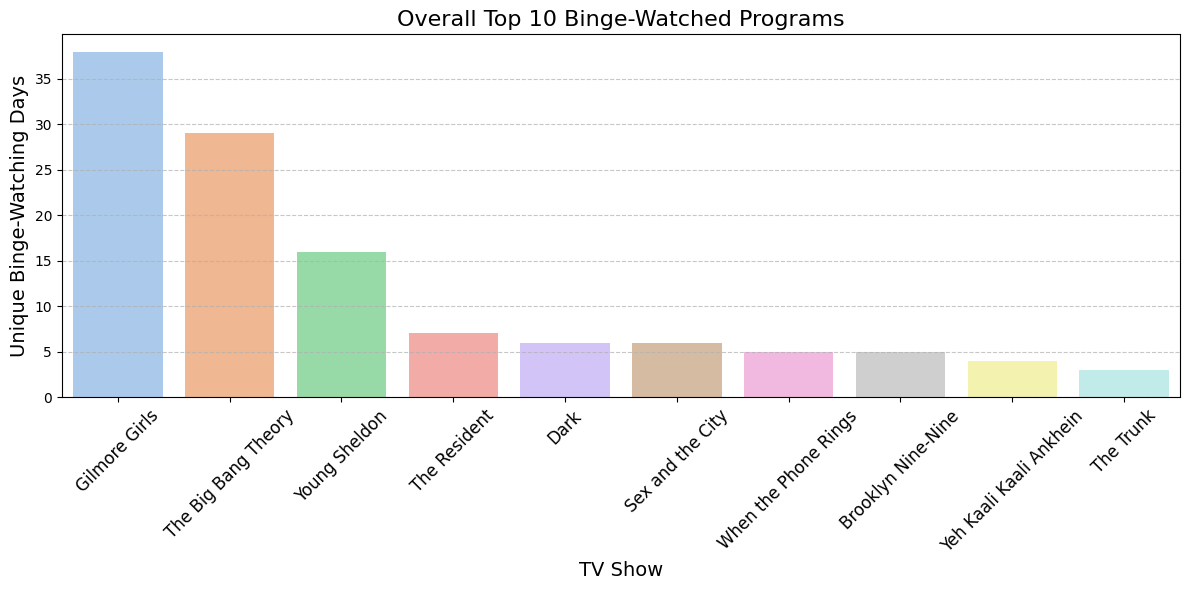

In [34]:
# Plot overall top 10 binge-watched programs
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_binge_overall,
    x='TV Show',
    y='Unique_Binge_Days',
    palette='pastel'
)
plt.title('Overall Top 10 Binge-Watched Programs', fontsize=16)
plt.ylabel('Unique Binge-Watching Days', fontsize=14)
plt.xlabel('TV Show', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [35]:
# Step 1: Count Total Binge-Watching Days per User
total_binge_days_per_user = (
    binge_watch_data.groupby('User')['Date']
    .nunique()  # Count unique binge-watching days per user
    .reset_index()
    .rename(columns={'Date': 'Total_Binge_Days'})
)

# Step 2: Count Total Episodes Watched During Binge-Watching per User
total_binge_episodes_per_user = (
    binge_watch_data.groupby('User')['Episode_Count']
    .sum()  # Sum total episodes watched in binge sessions
    .reset_index()
    .rename(columns={'Episode_Count': 'Total_Binge_Episodes'})
)

# Step 3: Merge Results into a Single DataFrame
binge_summary_per_user = pd.merge(
    total_binge_days_per_user,
    total_binge_episodes_per_user,
    on='User'
)

# Display the summary
print("Binge-Watching Summary Per User:")
print(binge_summary_per_user)


Binge-Watching Summary Per User:
     User  Total_Binge_Days  Total_Binge_Episodes
0  Choity                24                   244
1  Fairuj                17                   116
2  Nishat                43                   436
3   Oishi                33                   375
4  Reshad                 3                    23
5    Reza                24                   275


/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/2038231862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


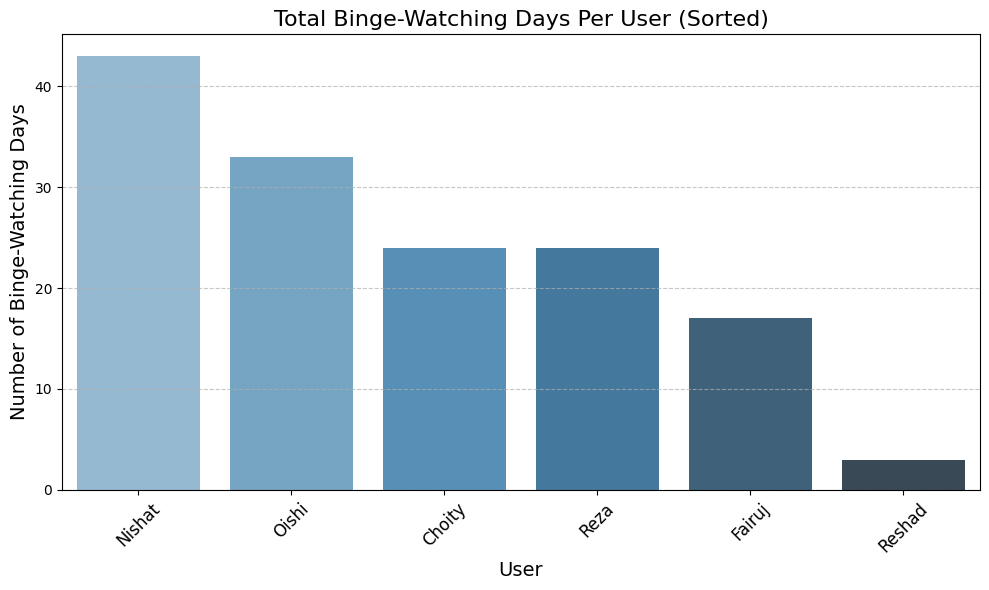

In [36]:
# Sort binge summary by Total Binge Days
binge_summary_sorted_days = binge_summary_per_user.sort_values(by='Total_Binge_Days', ascending=False)

# Plot Total Binge-Watching Days (Sorted)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=binge_summary_sorted_days,
    x='User',
    y='Total_Binge_Days',
    palette='Blues_d'
)
plt.title('Total Binge-Watching Days Per User (Sorted)', fontsize=16)
plt.ylabel('Number of Binge-Watching Days', fontsize=14)
plt.xlabel('User', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Favourite shows

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3843383211.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_watched_shows.groupby('User')
/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3843383211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


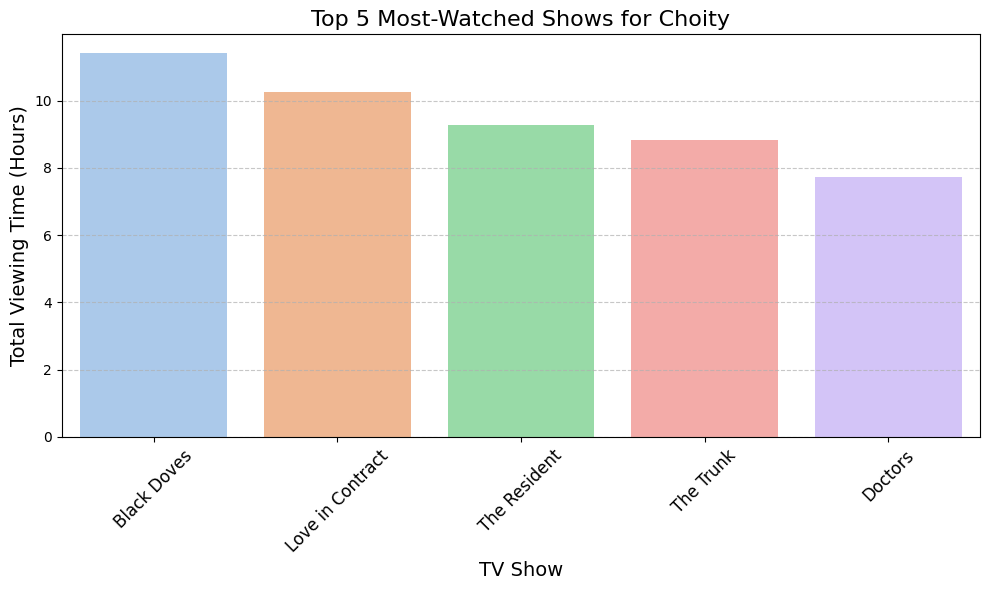

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3843383211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


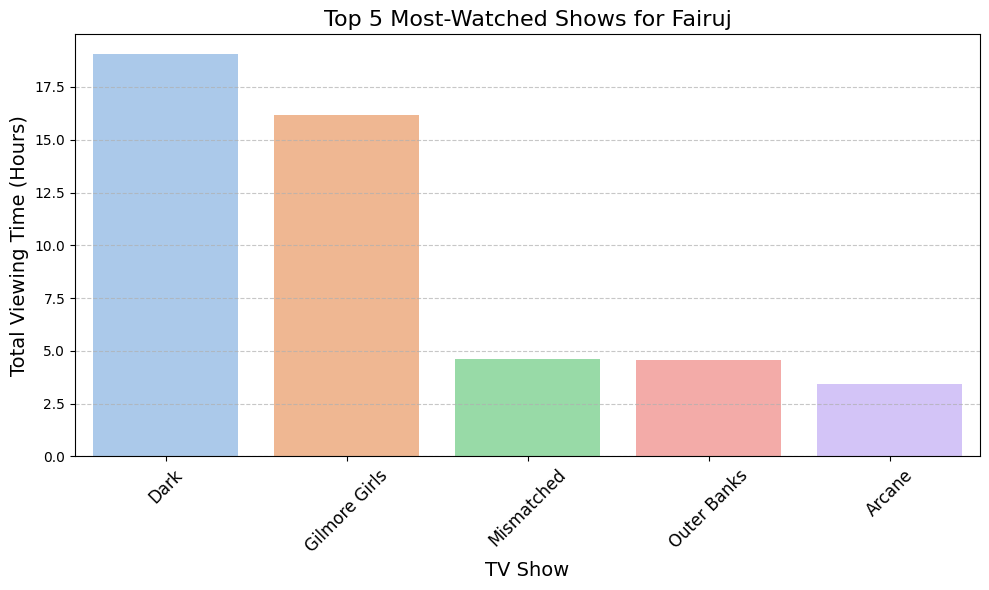

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3843383211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


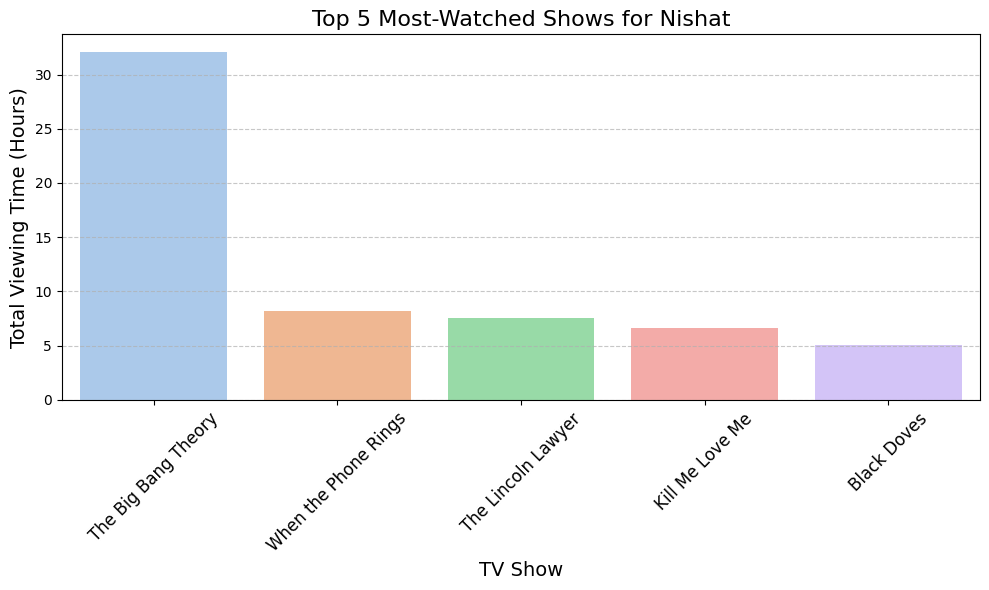

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3843383211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


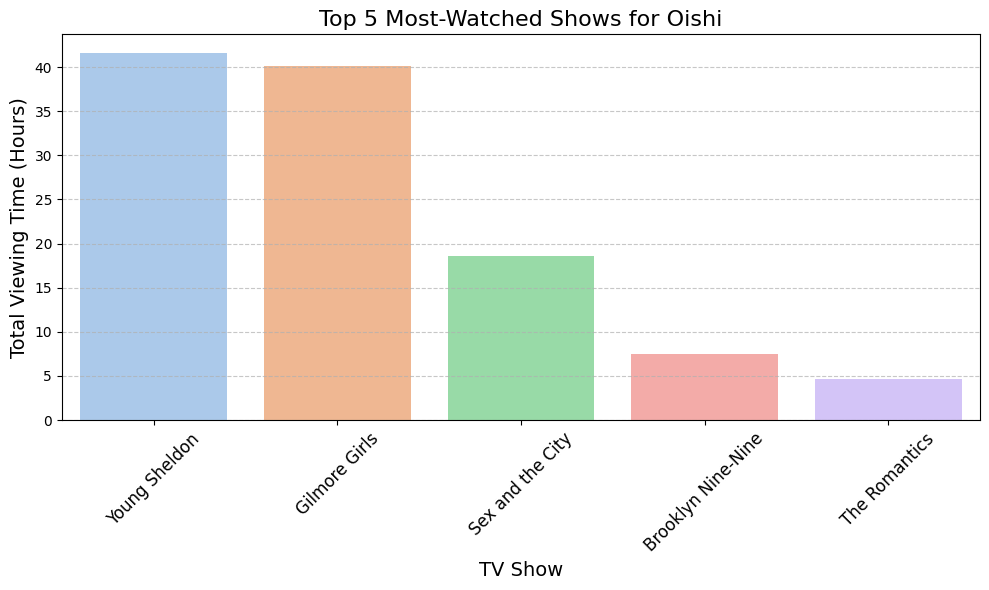

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3843383211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


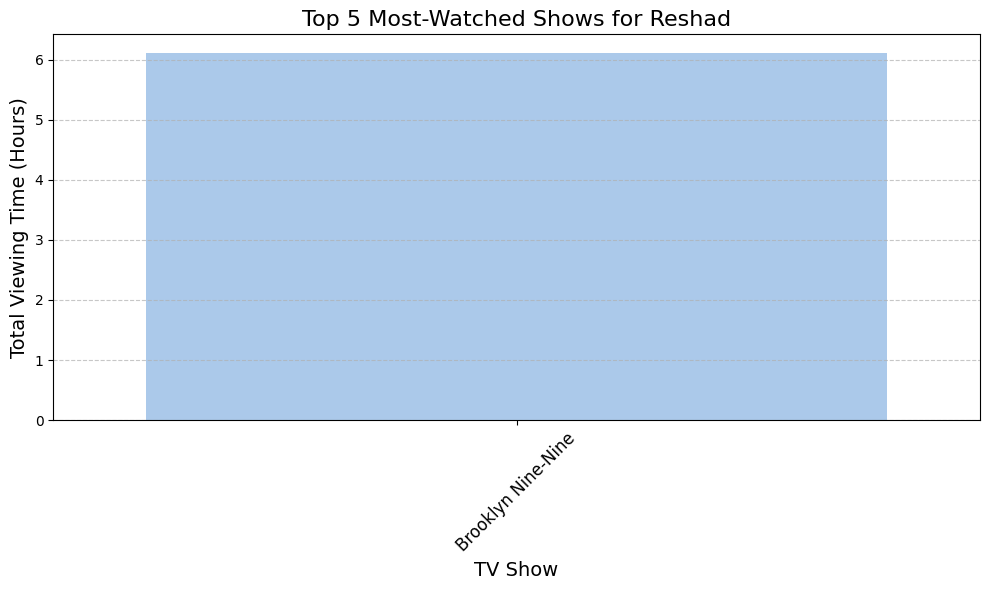

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/3843383211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


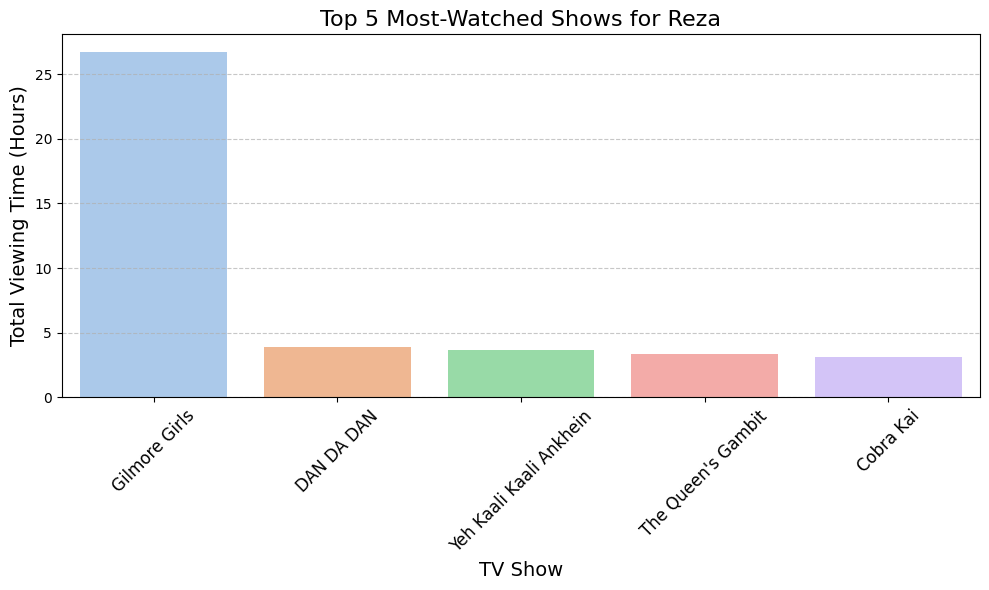

In [37]:
# Group by User and TV Show to calculate total viewing time
most_watched_shows = (
    viewing_activity.groupby(['User', 'TV Show'])['Duration (hr)']
    .sum()
    .reset_index()
    .rename(columns={'Duration (hr)': 'Total_Viewing_Time (hr)'})
)

# Get the top 5 most-watched shows for each user
top_5_shows_per_user = (
    most_watched_shows.groupby('User')
    .apply(lambda x: x.nlargest(5, 'Total_Viewing_Time (hr)'))
    .reset_index(drop=True)
)

# Visualize the top 5 most-watched shows for each user
users = top_5_shows_per_user['User'].unique()

for user in users:
    # Filter data for the current user
    user_data = top_5_shows_per_user[top_5_shows_per_user['User'] == user]
    
    # Plot the top 5 shows
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=user_data,
        x='TV Show',
        y='Total_Viewing_Time (hr)',
        palette='pastel'
    )
    plt.title(f'Top 5 Most-Watched Shows for {user}', fontsize=16)
    plt.ylabel('Total Viewing Time (Hours)', fontsize=14)
    plt.xlabel('TV Show', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Analyze Message Engagement

Click-Through Rate (CTR) by Profile:
  Profile Name  Total_Messages  Total_Clicks    CTR (%)
0       Choity             127            22  17.322835
1       Nishat             103            15  14.563107
2        Oishi              39             0   0.000000
3       Reshad               2             0   0.000000
4         Reza              24             0   0.000000


/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/1535998594.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


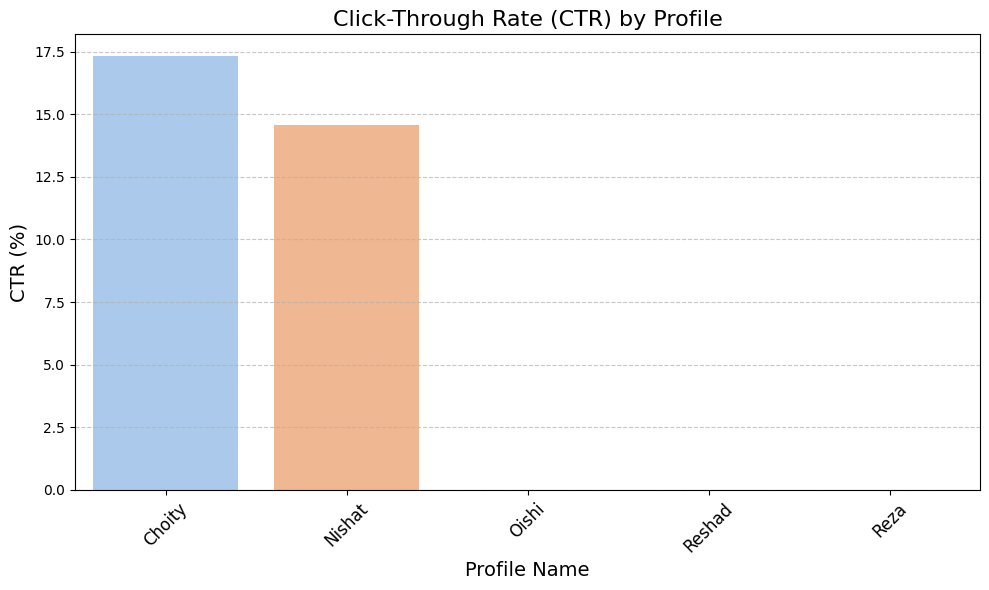

In [38]:
# Ensure 'Sent Utc Ts' and 'Click Utc Ts' are in datetime format
messages['Sent Utc Ts'] = pd.to_datetime(messages['Sent Utc Ts'], errors='coerce')
messages['Click Utc Ts'] = pd.to_datetime(messages['Click Utc Ts'], errors='coerce')

# Calculate Click-Through Rate (CTR)
messages['CTR'] = (messages['Click Cnt'] > 0).astype(int)  # 1 if clicked, 0 otherwise

# Aggregate CTR by user
user_ctr = (
    messages.groupby('Profile Name')
    .agg(
        Total_Messages=('CTR', 'count'),
        Total_Clicks=('CTR', 'sum')
    )
    .reset_index()
)

# Add CTR percentage
user_ctr['CTR (%)'] = (user_ctr['Total_Clicks'] / user_ctr['Total_Messages']) * 100

# Display the results
print("Click-Through Rate (CTR) by Profile:")
print(user_ctr)

# --- Visualization ---
# Bar plot of CTR per user
plt.figure(figsize=(10, 6))
sns.barplot(
    data=user_ctr,
    x='Profile Name',
    y='CTR (%)',
    palette='pastel'
)
plt.title('Click-Through Rate (CTR) by Profile', fontsize=16)
plt.ylabel('CTR (%)', fontsize=14)
plt.xlabel('Profile Name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Influence of Messages on Viewing Behavior

In [39]:
viewing_activity.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Title', 'Device Type',
       'Country', 'User', 'Duration (min)', 'Duration (hr)', 'Start Time UTC',
       'Year', 'Month', 'Date_of_month', 'day_of_week', 'day_name', 'TV Show',
       'Season', 'Episode', 'Content Type', 'Date'],
      dtype='object')

In [40]:
viewing_activity['Start Time UTC'] = pd.to_datetime(viewing_activity['Start Time UTC'], errors='coerce')

In [41]:
# Step 1: Join messages with viewing_activity on Profile Name and Title
merged_data = pd.merge(
    messages,
    viewing_activity,
    left_on=['Profile Name', 'Title Name'],
    right_on=['Profile Name', 'Title'],
    how='inner'
)

# Step 2: Calculate the time difference between message sent and show viewed
merged_data['Time_Difference'] = (merged_data['Start Time UTC'] - merged_data['Sent Utc Ts']).dt.days

# Step 3: Filter for influenced views (within 7 days of receiving the message)
influenced_views = merged_data[(merged_data['Time_Difference'] >= 0) & (merged_data['Time_Difference'] <= 7)]

# Step 4: Aggregate metrics
# Total messages sent, influenced views, and total views
user_metrics = viewing_activity.groupby('User')['Title'].nunique().reset_index().rename(columns={'Title': 'Total_Viewed_Shows'})
influenced_metrics = influenced_views.groupby('User').agg(
    Total_Messages=('Title Name', 'count'),
    Influenced_Views=('Title', 'nunique')
).reset_index()

# Merge metrics to calculate percentages
final_metrics = pd.merge(user_metrics, influenced_metrics, on='User', how='left').fillna(0)
final_metrics['Influence (% of Messages)'] = (final_metrics['Influenced_Views'] / final_metrics['Total_Messages']) * 100
final_metrics['Influence (% of Total Views)'] = (final_metrics['Influenced_Views'] / final_metrics['Total_Viewed_Shows']) * 100


In [42]:
# Display the results
print("Enhanced Influence of Messages on Viewing Behavior:")
final_metrics

Enhanced Influence of Messages on Viewing Behavior:


,User,Total_Viewed_Shows,Total_Messages,Influenced_Views,Influence (% of Messages),Influence (% of Total Views)
0,Choity,274,0.0,0.0,NaN,0.000000
1,Fairuj,73,0.0,0.0,NaN,0.000000
2,Nishat,305,31.0,4.0,12.903226,1.311475
3,Oishi,302,0.0,0.0,NaN,0.000000
4,Reshad,21,0.0,0.0,NaN,0.000000
5,Reza,189,2.0,1.0,50.000000,0.529101


/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/1850551046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


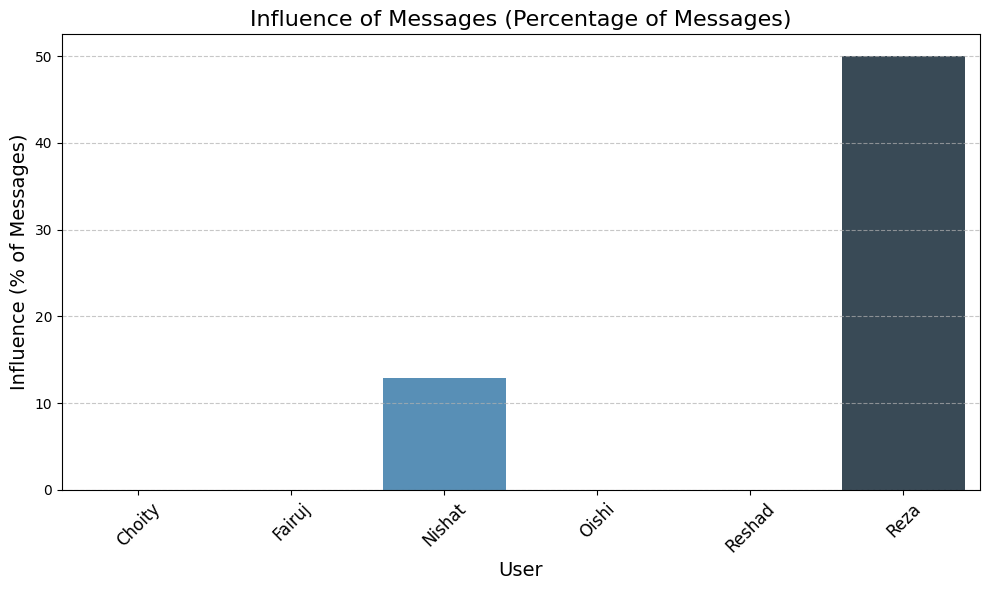

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_2941/1850551046.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


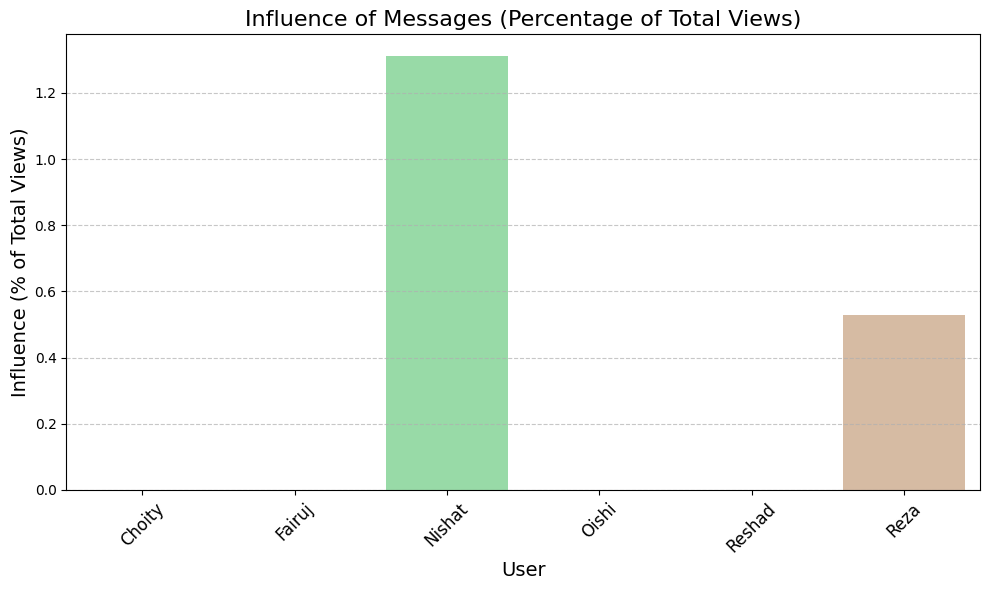

In [43]:
# --- Visualization ---
# Plot 1: Percentage of shows influenced by messages (out of total messages)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=final_metrics,
    x='User',
    y='Influence (% of Messages)',
    palette='Blues_d'
)
plt.title('Influence of Messages (Percentage of Messages)', fontsize=16)
plt.ylabel('Influence (% of Messages)', fontsize=14)
plt.xlabel('User', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Percentage of shows influenced by messages (out of total viewed shows)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=final_metrics,
    x='User',
    y='Influence (% of Total Views)',
    palette='pastel'
)
plt.title('Influence of Messages (Percentage of Total Views)', fontsize=16)
plt.ylabel('Influence (% of Total Views)', fontsize=14)
plt.xlabel('User', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Influence of messages over user preference is negligible